In [1]:
'''Worksheet to compare outputs of pyCissa with the original Matlab version, https://github.com/jbogalo/CiSSA
Data file EPC.xlsx is data associated with power consumption in Spain measured monthly. It also contains output generated by the original Matlab version of Cissa so is a nice validation for the Python version.'''

'Worksheet to compare outputs of pyCissa with the original Matlab version, https://github.com/jbogalo/CiSSA\nData file EPC.xlsx is data associated with power consumption in Spain measured monthly. It also contains output generated by the original Matlab version of Cissa so is a nice validation for the Python version.'

In [2]:
## Load required packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.chdir('../../..')
home_path = os.path.abspath('')
from pycissa import Cissa

In [4]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')
print(data.head(5))

cissa_object = Cissa(t=data['Date'],x=data['Electric power consumption in Spain'])

        Date  Electric power consumption in Spain
0 1975-01-01                               6875.3
1 1975-02-01                               6201.8
2 1975-03-01                               6543.6
3 1975-04-01                               6267.2
4 1975-05-01                               5870.2


In [5]:
## Define parameters  (https://github.com/jbogalo/CiSSA/issues/2#issuecomment-1296310840)
L = 96
data_per_year = 12

In [6]:
cissa_object.auto_cissa_classic(L=L,I=data_per_year)

Checking for censored or nan data...


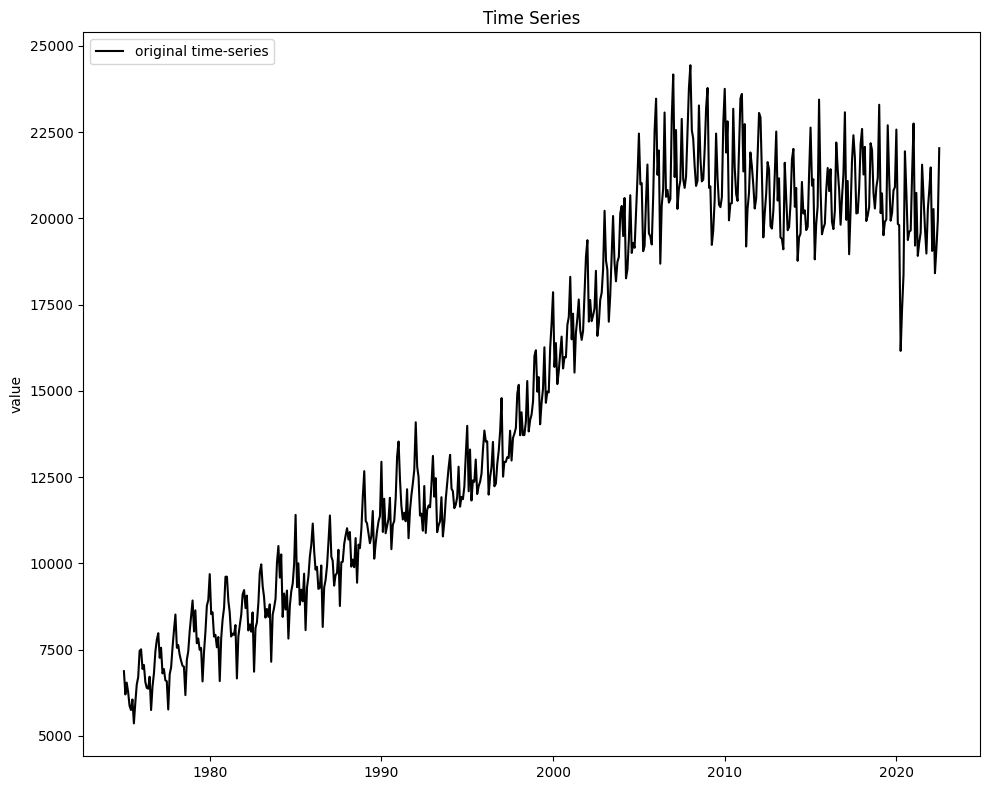

In [7]:
## Plot the data
cissa_object.figures.get('cissa').get('figure_original_time_series')

dict_keys(['seasonality', 'long term cycle', 'trend', 'noise'])


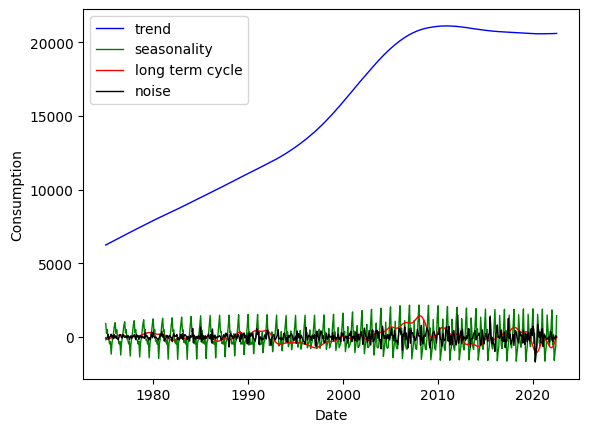

In [8]:
## Plot grouped components
rc = cissa_object.results['cissa']['manual']['rc']
print(rc.keys())

plt.plot(data['Date'], cissa_object.x_trend, 'b', lw=1.0, label = 'trend')
plt.plot(data['Date'], cissa_object.x_seasonality, 'g', lw=1.0, label = 'seasonality')
plt.plot(data['Date'], cissa_object.x_long_term_cycle, 'r', lw=1.0, label = 'long term cycle')
plt.plot(data['Date'], cissa_object.x_noise, 'k', lw=1.0, label = 'noise')
plt.legend(loc="upper left")
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()

In [9]:
## Load Matlab Results
results = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'rc')
psd_results = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'psd',header = None)
Z_results = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Z',header = None)

In [10]:
## Error in psd
percentage_error = []
for python_psd,matlab_psd in zip(cissa_object.psd,psd_results.values):
    percentage_error.append((python_psd-matlab_psd)/matlab_psd*100)

print('PSD maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')    

PSD maximum absolute error (percentage) =  2.3703463314122347e-11 %


In [11]:
## Error in Z
percentage_error = []
for python_z,matlab_z in zip(cissa_object.Z,Z_results.values):
    percentage_error.append((python_z-matlab_z)/matlab_z*100)

print('Z maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')    


Z maximum absolute error (percentage) =  1.072671594600443e-08 %


In [12]:
## Error in trend component
percentage_error = []
for python_j,matlab_j in zip(cissa_object.x_trend,results['Trend'].values):
    percentage_error.append((python_j-matlab_j)/matlab_j*100)

print('Trend maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')    

Trend maximum absolute error (percentage) =  5.930607853296446e-13 %


In [13]:
## Error in seasonality component
percentage_error = []
for python_j,matlab_j in zip(cissa_object.x_seasonality,results['Seasonality'].values):
    percentage_error.append((python_j-matlab_j)/matlab_j*100)

print('Seasonality maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')   



Seasonality maximum absolute error (percentage) =  2.42044171043676e-11 %


In [14]:
## Error in long term cycle component
percentage_error = []
for python_j,matlab_j in zip(cissa_object.x_long_term_cycle,results['Business cycle'].values):
    percentage_error.append((python_j-matlab_j)/matlab_j*100)

print('Business cycle maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')   

Business cycle maximum absolute error (percentage) =  7.274754365792257e-09 %


## As seen in the tests above, pyCissa agrees with Matlab version of Cissa.
## This shows us that our code is faithfully reproducing the Matlab version of the code.